# Импорт

In [145]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score

from joblib import dump


# Загружаем датасет и разбиваем её на выборку.

In [146]:
data = pd.read_csv(
    '../Data/DataLaba1/energy_task_moded_removed_nan.csv').drop('year', axis=1)
a = -1
b = 1
power = 2
data = data.apply(lambda s: (s-s.mean())/s.std())
# data = data.apply(lambda s: a + (s - s.min())/(s.max() - s.min()) * (b-a))
sl = data.shape[0]
X_train, X_test, y_train, y_test = train_test_split(PolynomialFeatures(power).fit_transform(
    data.drop('Appliances', axis=1)[0:sl]), data['Appliances'][0:sl], test_size=0.25)



In [147]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(X_train.shape[1]*1.5,
                                activation='sigmoid',
                                input_shape=(X_train.shape[1],),
                                name='input',
                              #   kernel_regularizer=tf.keras.regularizers.L1L2(l1=93, l2=93),
                                # bias_initializer=tf.keras.initializers.GlorotNormal,
                                use_bias=True
                                ))
model.add(tf.keras.layers.Dense(int(X_train.shape[1]*2),
                                activation='sigmoid',
                                name='hidden_layer_2',
                                #   bias_constraint=tf.keras.constraints.max_norm(1000.),
                                # kernel_regularizer=tf.keras.regularizers.L1L2(l1=93, l2=93),
                                use_bias=True,
                                # bias_initializer=tf.keras.initializers.GlorotNormal
                                ))
model.add(tf.keras.layers.Dense(int(X_train.shape[1]*0.5),
                                activation='sigmoid',
                                name='hidden_layer_3',
                                #   bias_constraint=tf.keras.constraints.max_norm(1000.),
                                # kernel_regularizer=tf.keras.regularizers.L1L2(l1=93, l2=93),
                                use_bias=True,
                                # bias_initializer=tf.keras.initializers.GlorotNormal
                                ))
model.add(tf.keras.layers.Dense(1,
                                name='output',
                                activation='sigmoid',
                                # kernel_regularizer=tf.keras.regularizers.L1L2(l1=93, l2=93),
                                use_bias=True,
                                # bias_initializer=tf.keras.initializers.HeNormal
                                ))
model.compile(loss='mse',optimizer='Adam', metrics=['mse'])


## Компиляция

In [148]:
model.compile(
    optimizer='Adam',
    loss='mse',
    metrics=['mse', 'mae'],
    jit_compile=True
)


# Обучение

In [149]:
model.fit(
    X_train,
    y_train,
    validation_split=0.6,
    epochs=200,
    batch_size=10,
    # workers=4,
    use_multiprocessing=True,
)


Epoch 1/200
557/557 [==============================] - 7s 10ms/step - loss: 0.9652 - mse: 0.9652 - mae: 0.5901 - val_loss: 1.0275 - val_mse: 1.0275 - val_mae: 0.5877
Epoch 2/200
557/557 [==============================] - 5s 8ms/step - loss: 0.9644 - mse: 0.9644 - mae: 0.5887 - val_loss: 1.0275 - val_mse: 1.0275 - val_mae: 0.5877
Epoch 3/200
557/557 [==============================] - 5s 8ms/step - loss: 0.9644 - mse: 0.9644 - mae: 0.5887 - val_loss: 1.0275 - val_mse: 1.0275 - val_mae: 0.5877
Epoch 4/200
557/557 [==============================] - 5s 8ms/step - loss: 0.9646 - mse: 0.9646 - mae: 0.5895 - val_loss: 1.0275 - val_mse: 1.0275 - val_mae: 0.5877
Epoch 5/200
557/557 [==============================] - 5s 8ms/step - loss: 0.9644 - mse: 0.9644 - mae: 0.5887 - val_loss: 1.0275 - val_mse: 1.0275 - val_mae: 0.5877
Epoch 6/200
557/557 [==============================] - 5s 8ms/step - loss: 0.9644 - mse: 0.9644 - mae: 0.5887 - val_loss: 1.0275 - val_mse: 1.0275 - val_mae: 0.5877
Epoch 7/2

# Predict

In [150]:
y_predicted = model.predict(X_test).T[0]


145/145 [==============================] - 1s 3ms/step


In [151]:
y_predicted


array([0.00265853, 0.00274826, 0.9999999 , ..., 0.00265354, 0.00265346,
       0.00265345], dtype=float32)

In [152]:
model.weights

[<tf.Variable 'input/kernel:0' shape=(435, 652) dtype=float32, numpy=
 array([[-0.4218765 , -0.48006925, -0.57515126, ...,  0.0578434 ,
         -0.18486819, -0.55442554],
        [ 0.15342359, -0.22191438, -0.04355546, ..., -0.23534481,
         -0.06329241,  0.4019679 ],
        [-0.43568397,  0.12287328,  0.08180244, ..., -0.20345421,
          0.02200166,  0.02606555],
        ...,
        [-0.4069189 , -0.29527333, -0.37337062, ...,  0.02684354,
          0.09646554, -0.5044022 ],
        [-0.11313161, -0.17875348, -0.02604054, ...,  0.1301525 ,
         -0.3305895 ,  0.07076989],
        [-0.5003864 ,  0.23228526, -0.17109416, ...,  0.5940604 ,
         -0.5546924 , -0.9778006 ]], dtype=float32)>,
 <tf.Variable 'input/bias:0' shape=(652,) dtype=float32, numpy=
 array([-4.00248110e-01, -4.15379286e-01, -5.46584189e-01, -1.94457874e-01,
         1.21219819e-02, -1.19394518e-01, -3.76794785e-01, -4.78785783e-01,
         1.25207882e-02, -1.07766144e-01,  6.26742169e-02, -3.36753994e

# Оценка качества 

In [153]:
y_all = model.predict(PolynomialFeatures(power).fit_transform(
    data.drop('Appliances', axis=1)[0:sl])).T[0]


580/580 [==============================] - 2s 3ms/step


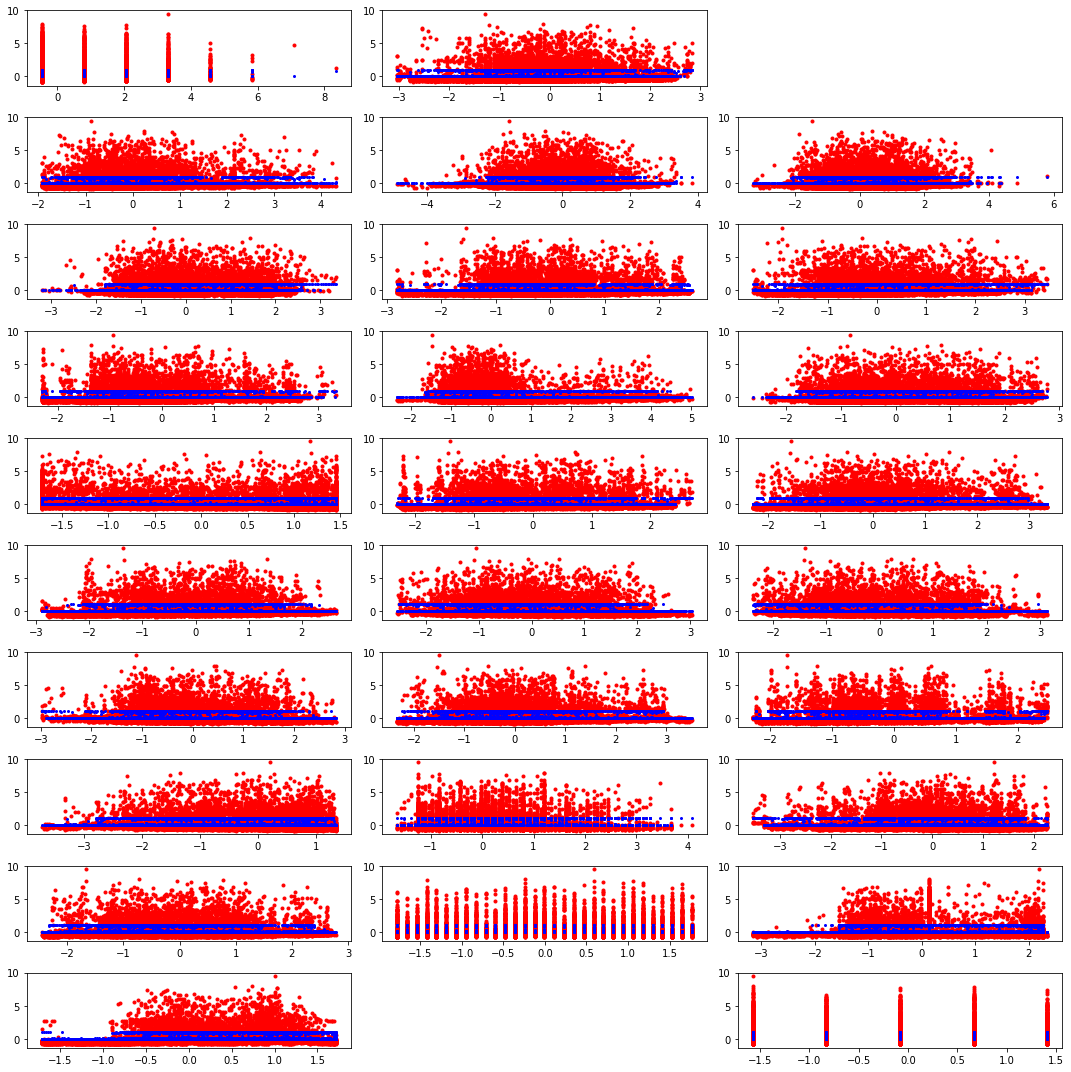

In [154]:
import matplotlib.gridspec as gridspec

fig = plt.figure(tight_layout=True)
fig.set_figheight(15)
fig.set_figwidth(15)
c = data.drop('Appliances', axis=1).columns
xl = c.shape[0] // 3 + (c.shape[0] % 3 > 0)
yl = 3
gs = gridspec.GridSpec(xl, yl)
z=0
k=0
for i in c:
  z = z % xl
  k = k % yl
  ax = fig.add_subplot(gs[int(z), int(k)])
  ax.plot(data[i], data['Appliances'], 'ro', markersize=3)
  ax.plot(data[i], y_all, 'bo', markersize=2)
  k+=1
  z+=(k % 3) // 2
  

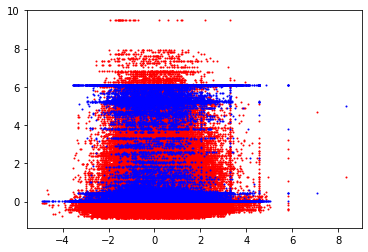

In [174]:
plt.plot(data.drop('Appliances', axis=1)[0:sl],
         data['Appliances'][0:sl], 'ro', markersize=1)
plt.plot(data.drop('Appliances', axis=1)[0:sl], y_all*6.1, 'bo', markersize=1)


In [175]:
print(f"MAE: {mean_absolute_error(y_predicted, y_test)}",
      f'RMSE: {mean_squared_error(y_predicted, y_test)}',
      f'MSE: {mean_squared_error(y_predicted, y_test)**0.5}',
      f'MAPE: {mean_absolute_percentage_error(y_predicted, y_test)}',
      f'R^2: {r2_score(y_predicted*6.1, y_test)}',
      sep='\n')

MAE: 0.585090638967867
RMSE: 0.7980225936493408
MSE: 0.8933211033269844
MAPE: 141.55203393412785
R^2: 0.06958339024260096
